In [1]:
!pip install pandas duckdb matplotlib

import pandas as pd
import duckdb
import os
import matplotlib.pyplot as plt

file_combined_path = '../spec-cpu2006-2017.csv'

if os.path.exists(file_combined_path):
    df_combined = pd.read_csv(file_combined_path)
else:
    # Load data from the first CSV file
    file1_path = '../cpu2006-results-20240723-164205.csv'
    if os.path.exists(file1_path):
        data1 = pd.read_csv(file1_path)
    else:
        raise FileNotFoundError(f"The file {file1_path} does not exist.")

    # Load data from the second CSV file
    file2_path = '../cpu2017-results-20240723-171407.csv'
    if os.path.exists(file2_path):
        data2 = pd.read_csv(file2_path)
    else:
        raise FileNotFoundError(f"The file {file2_path} does not exist.")

    # Add a column to each dataframe to label the source
    data1['Source'] = 'cpu2006'
    data2['Source'] = 'cpu2017'
    data2['Baseline'] = data2['Base Result'] #/ 9

    # Concatenate the dataframes
    df_combined = pd.concat([data1, data2], ignore_index=True)
    df_combined["hw_avail_year"] = df_combined["HW Avail"].str.split('-').str[1].astype(int)
    df_combined["baseline_per_chip"] = df_combined["Baseline"] / df_combined["# Chips "]
    df_combined["baseline_per_core"] = df_combined["Baseline"] / df_combined["# Cores"]
    # df_combined.to_csv(file_combined_path, index=False)
    
# con = duckdb.connect("../spec.db")
# con.sql("DROP TABLE IF EXISTS spec")
# con.sql("CREATE TABLE spec AS SELECT * FROM df_combined")
# con.close()


/var/folders/z4/3bk11y114tn3lh60qlpnzh6m0000gn/T/ipykernel_74944/688129209.py:23: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv(file2_path)


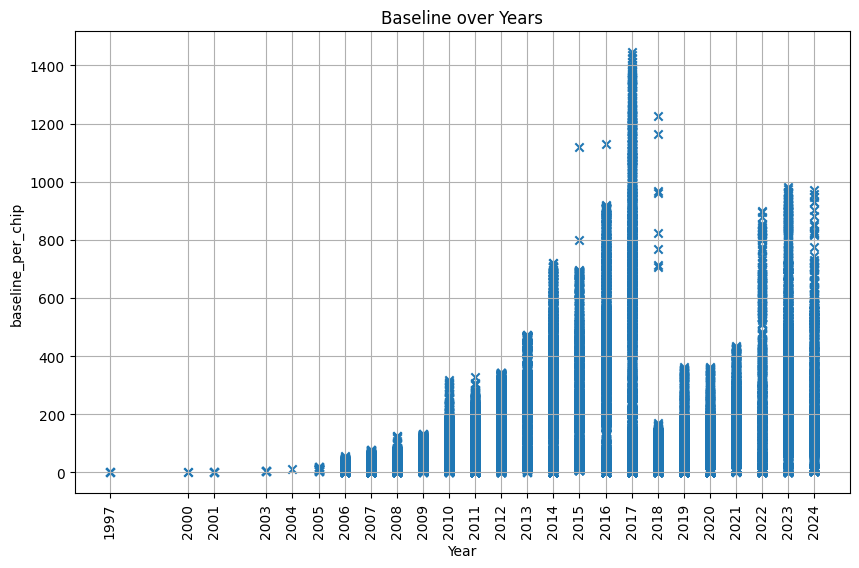

In [2]:
plt.close('all')
# display(df_combined)
plt.figure(figsize=(10, 6))
# y_val = 'Baseline'
y_val = 'baseline_per_chip'
#y_val = 'baseline_per_core'
plt.scatter(
    df_combined['hw_avail_year'],
    df_combined[y_val],
    marker='x')
plt.xlabel('Year')
plt.ylabel(y_val)
plt.title('Baseline over Years')
plt.xticks(ticks=df_combined['hw_avail_year'].unique(), rotation=90)
plt.grid(True)
plt.show()
plt.close()